In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
plt.style.use(u'ggplot')
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv('trainingData.csv').dropna()
df.As_Of_Date = pd.to_datetime(df.As_Of_Date) # conform datatype to datetime
df.set_index(['Ticker', 'As_Of_Date'], inplace=True)

In [3]:
var_df = df[[i for i in df.columns if i.startswith('Var_')]]
var_std_df =  pd.DataFrame(preprocessing.StandardScaler().fit_transform(var_df), columns=var_df.columns, index=var_df.index)

price_df = df[[i for i in df.columns if i.startswith('price_')]]
price_std_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(price_df), columns=price_df.columns, index=price_df.index)

std_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

In [4]:
t_df = (std_df.corr()*100).astype(int)[price_df.columns][4:]

In [5]:
T_df = t_df.assign(mean=t_df.mean(axis=1)).sort_values('mean', ascending=False).drop('mean', axis=1)

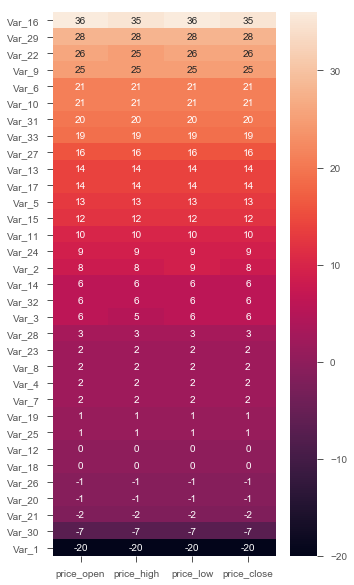

In [6]:
plt.figure(figsize=(5,10))
sns.heatmap(T_df, annot=True);
#Powerful feature ranking for all caompanies

In [ ]:
# After standardize, check the trend of price

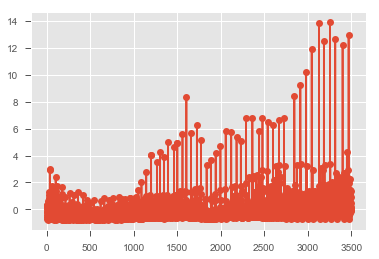

In [14]:
plt.plot(range(1,3498), price_std_df['price_open'], marker='o')
# There are fast-growing companies and slow-growing companies. We need to find significant features for different companies.

In [15]:
df['mean_price']=price_df.mean(axis=1)

In [16]:
df.reset_index(level=0, inplace=True)

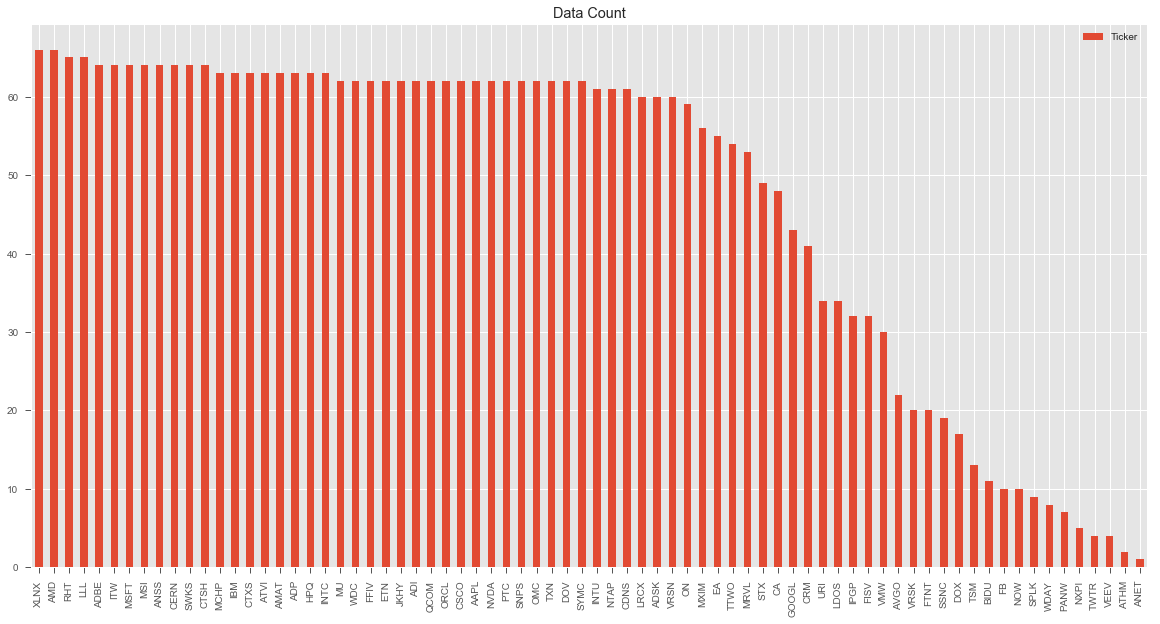

In [23]:
#Filter out companies with few records
ticker_counts = df.Ticker.value_counts().to_frame()
ticker_counts.plot.bar(figsize=(20,10), title='Data Count');

In [49]:
#ticker_counts.reset_index()
#ticker_counts

In [33]:
tickers_to_keep = ticker_counts.index[ticker_counts.Ticker>50].to_series()

In [34]:
filtered_df = df[df.Ticker.isin(tickers_to_keep)]

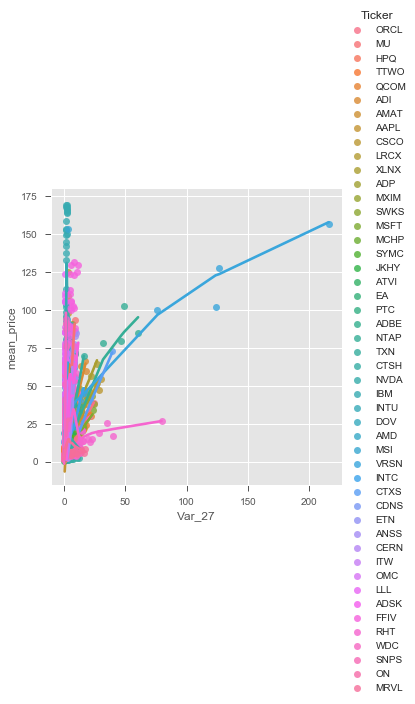

In [35]:
sns.lmplot(x='Var_27', y='mean_price', hue='Ticker', data=filtered_df, lowess=True)
#We need to check companies with different coefficient

In [36]:
TV_corr_df = filtered_df.groupby('Ticker').corr().mean_price.unstack(level=-1)[['Var_%d'%i for i in range(1,34)]]
TV_corr_df = TV_corr_df.reindex(TV_corr_df.mean(axis=1).abs().sort_values(ascending=False).index, axis=0)
TV_corr_df = TV_corr_df.reindex(TV_corr_df.mean(axis=0).abs().sort_values(ascending=False).index, axis=1)

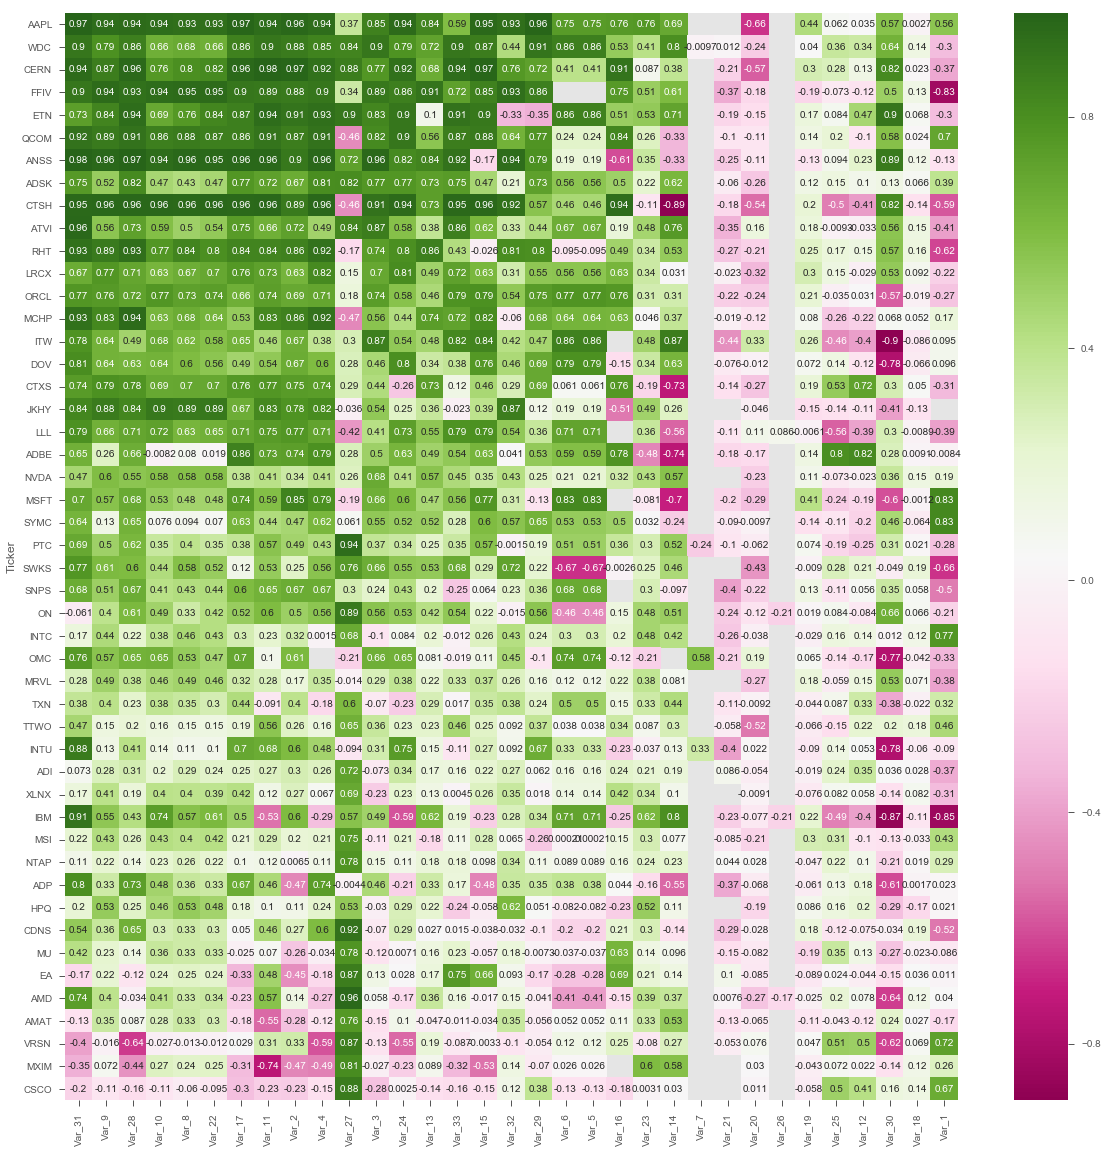

In [37]:
#Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(TV_corr_df, annot=True, cmap='PiYG');
#Var_27, Var_31, Var_9, Var_28, Var_10

In [38]:
from scipy import stats
def beta(series_1, series_2):
    slope, intercept, r_value, p_value, std_err = stats.linregress(series_2, series_1)
    return slope

def app(df):
    var_df = df[[i for i in df.columns if i.startswith('Var_')]]
    return var_df.apply(beta, args=(df.mean_price,))

TV_beta_df = filtered_df.groupby('Ticker').apply(app)
TV_beta_df.describe().Var_16

count    4.800000e+01
mean     2.683067e+07
std      1.128162e+08
min     -3.165139e+08
25%      0.000000e+00
50%      5.011232e+06
75%      2.376300e+07
max      6.608168e+08
Name: Var_16, dtype: float64

In [39]:
TV_beta_df = TV_beta_df.reindex(TV_beta_df.mean(axis=1).abs().sort_values(ascending=False).index, axis=0)
TV_beta_df = TV_beta_df.reindex(TV_beta_df.mean(axis=0).abs().sort_values(ascending=False).index, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


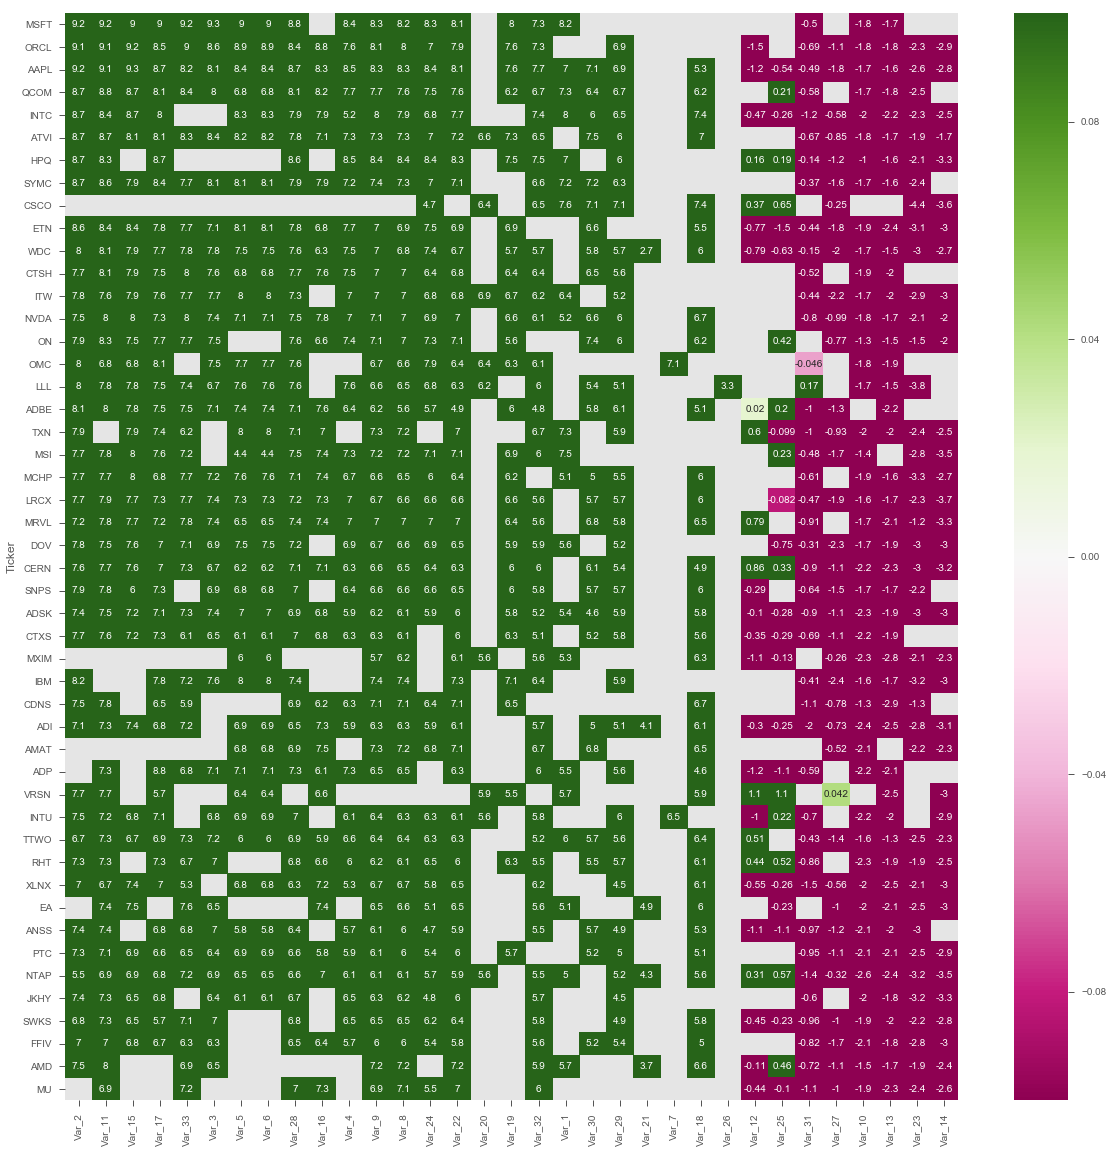

In [40]:
#Plot coefficient matrix
np=pd.np
plt.figure(figsize=(20,20))
sns.heatmap(np.log10(TV_beta_df), annot=True, cmap='PiYG');

In [41]:
corr_df = TV_corr_df.stack()
beta_df = TV_beta_df.stack()

In [42]:
#TV_corr_df

In [43]:
#beta_df

In [44]:
concat_df = pd.concat([corr_df.rename('Corr'), beta_df.rename('beta')], axis=1)
w_df=(concat_df.Corr*np.log10(concat_df.beta)).unstack(level=-1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


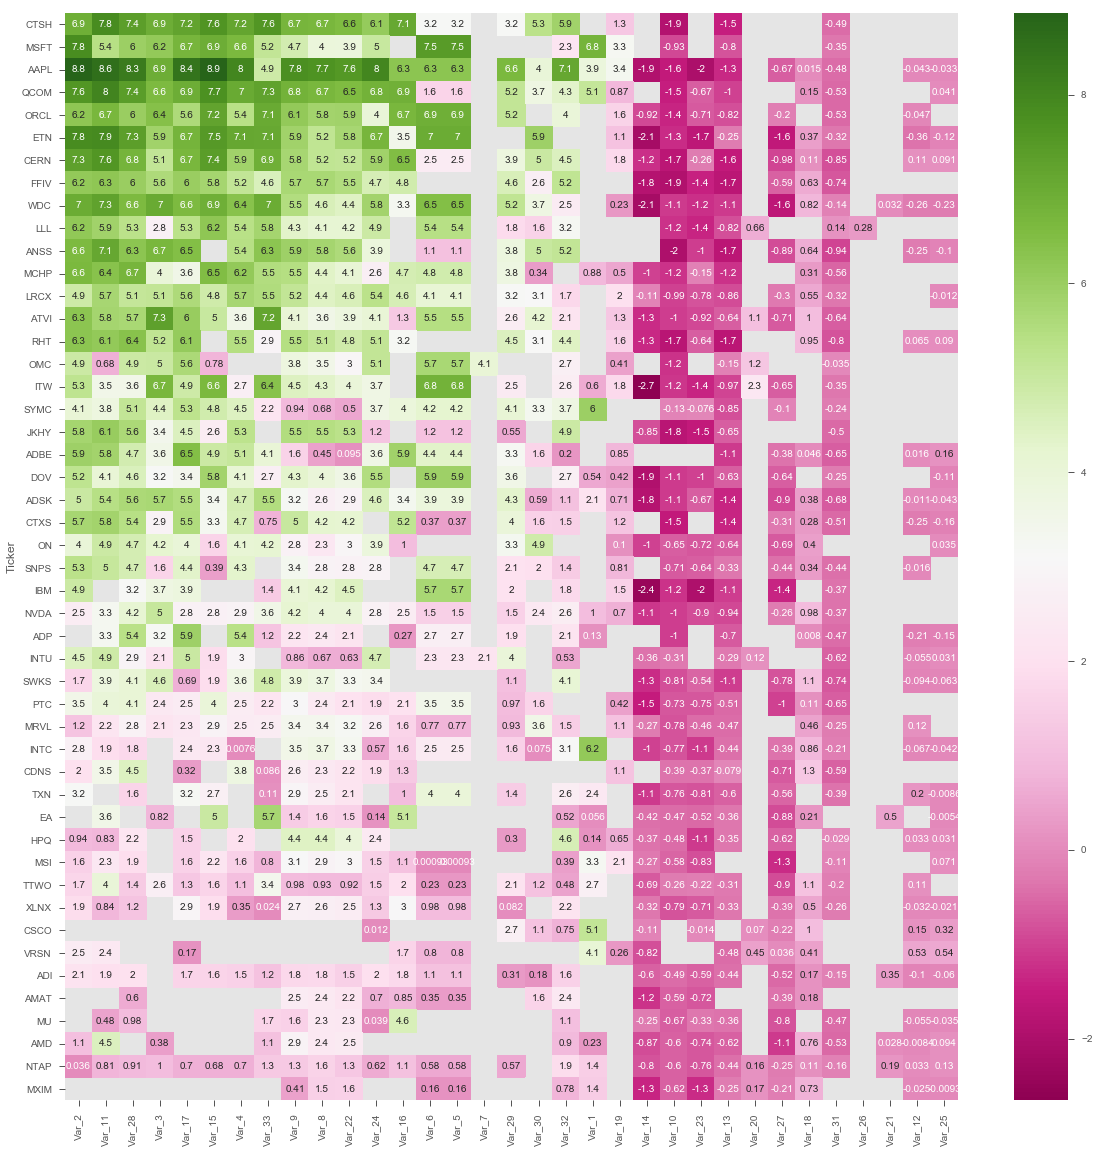

In [45]:
# Muiltiply the weight matrix with correlation matrix
w_df = w_df.reindex(w_df.mean(axis=1).abs().sort_values(ascending=False).index, axis=0)
w_df = w_df.reindex(w_df.mean(axis=0).abs().sort_values(ascending=False).index, axis=1)
#np=pd.np#import numpy as np
plt.figure(figsize=(20,20))
sns.heatmap(w_df, annot=True, cmap='PiYG');

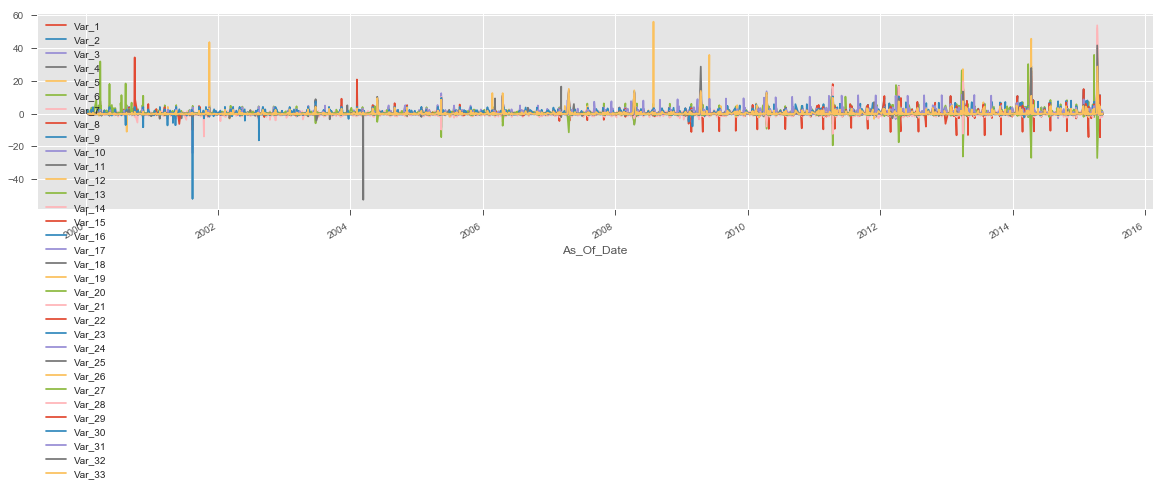

In [46]:
var_std_df.reset_index(level=0).plot(figsize=(20,4));

In [96]:
df_full = pd.read_csv('trainingData.csv')

In [89]:
#df_full

In [107]:
##Add dummy variables and check the powerful predictors for different groups

#df_full.set_index(['As_Of_Date'], inplace=True)
#filter_price_df=df_full.loc[df_full.index.isin(['2015-05-12'])]
#filter_price_df
#tickers_to_keep_1 = filter_price_df.index[filter_price_df.Ticker>50].to_series()

In [98]:
filter_price_df.set_index(['Ticker'], inplace=True)
tickers_high = filter_price_df.index[filter_price_df.price_open>78].to_series()
tickers_high

Ticker
AAPL      AAPL
GOOGL    GOOGL
IBM        IBM
AVGO      AVGO
BIDU      BIDU
VMW        VMW
ADP        ADP
INTU      INTU
ITW        ITW
NXPI      NXPI
WDAY      WDAY
WDC        WDC
PANW      PANW
SWKS      SWKS
LLL        LLL
ANSS      ANSS
URI        URI
IPGP      IPGP
FFIV      FFIV
Name: Ticker, dtype: object

In [103]:
df_high=df[df.Ticker.isin(tickers_high)]
df_low=df[~df.Ticker.isin(tickers_high)]
df_high_dummy=pd.get_dummies(df_high)
df_low_dummy=pd.get_dummies(df_low)

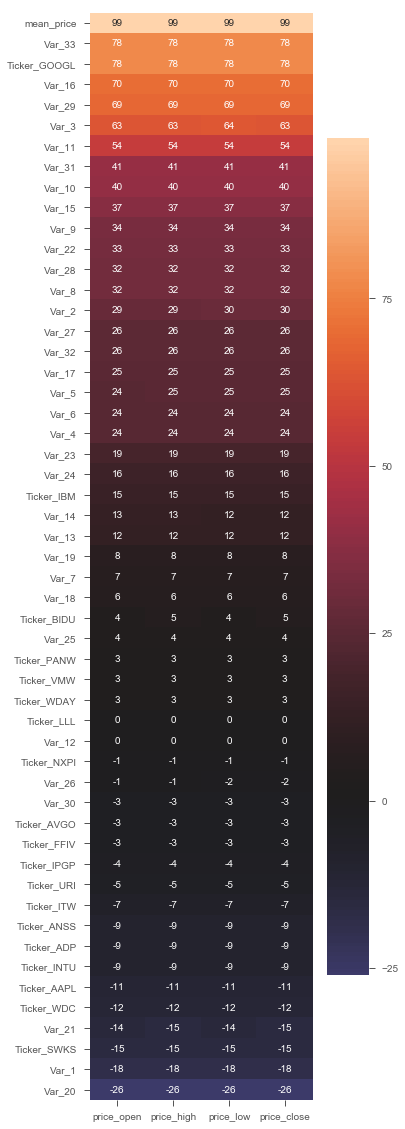

In [104]:
price_df = df[[i for i in df.columns if i.startswith('price_')]]
price_std_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(price_df), columns=price_df.columns, index=price_df.index)
std_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_high_dummy), columns=df_high_dummy.columns, index=df_high_dummy.index)
t_df = (std_df.corr()*100).astype(int)[price_df.columns][4:]
T_df = t_df.assign(mean=t_df.mean(axis=1)).sort_values('mean', ascending=False).drop('mean', axis=1)
import seaborn as sns
plt.figure(figsize=(5,20))
sns.heatmap(T_df, annot=True, center=True);

#Google has extremely high price
#Var_33, Var_16, Var_29, Var_3, Var_11 are powerful for high-price-companies
#I will also consider Var_27

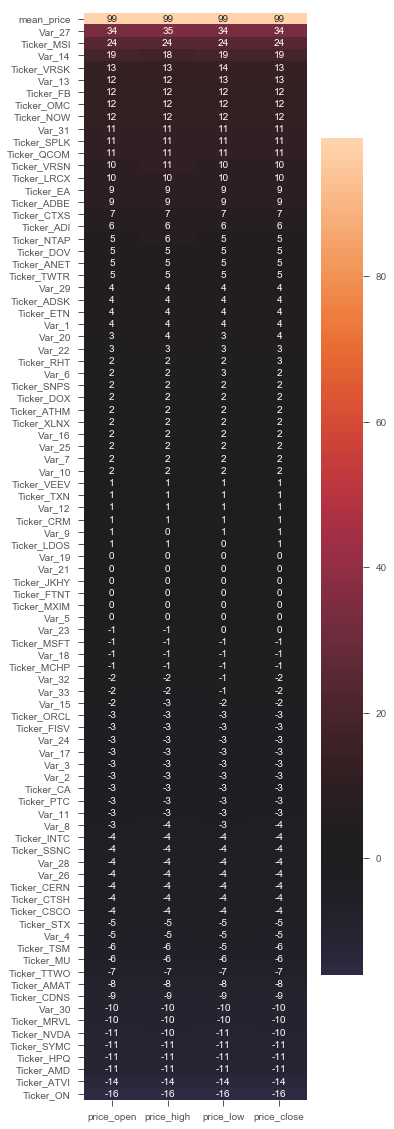

In [105]:
std_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_low_dummy), columns=df_low_dummy.columns, index=df_low_dummy.index)
t_df = (std_df.corr()*100).astype(int)[price_df.columns][4:]
T_df = t_df.assign(mean=t_df.mean(axis=1)).sort_values('mean', ascending=False).drop('mean', axis=1)
import seaborn as sns
plt.figure(figsize=(5,20))
sns.heatmap(T_df, annot=True, center=True);

#For low-price-companies, the prediction is not satisfying
#Var_27, Var_14, Var_13, Var_31, Var_29 are powerful for low-price-companies